In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the Excel file
file_path = 'Cleaned_Postcode-Registrations-Data-1 (1).xlsx'
data = pd.read_excel(file_path)
# Display the first few rows of the dataframe
data.head()

,Postcode,State,Fuel Type,Registrations as at 31 January 2021,Registrations as at 31 January 2022,Registrations as at 31 January 2023
0,800,NT,ICE,6780,7318,7089
1,800,NT,BEV,3,3,12
2,800,NT,HFCEV,0,0,0
3,800,NT,Hybrid/PHEV,131,411,402
4,810,NT,ICE,21870,22092,21890


In [30]:
# Grouping and finding top 10 for each year

# For the year 2021
top_2021 = data.groupby(['Fuel Type', 'Postcode','State'])['Registrations as at 31 January 2021'].sum().reset_index()
top_2021 = top_2021.sort_values(by='Registrations as at 31 January 2021', ascending=False).groupby('Fuel Type').head(10)

# For the year 2022
top_2022 = data.groupby(['Fuel Type', 'Postcode','State'])['Registrations as at 31 January 2022'].sum().reset_index()
top_2022 = top_2022.sort_values(by='Registrations as at 31 January 2022', ascending=False).groupby('Fuel Type').head(10)

# For the year 2023
top_2023 = data.groupby(['Fuel Type', 'Postcode','State'])['Registrations as at 31 January 2023'].sum().reset_index()
top_2023 = top_2023.sort_values(by='Registrations as at 31 January 2023', ascending=False).groupby('Fuel Type').head(10)

top_2021, top_2022, top_2023


(         Fuel Type  Postcode State  Registrations as at 31 January 2021
 9423           ICE      4350   QLD                                85839
 8604           ICE      3030   VIC                                77496
 8603           ICE      3029   VIC                                76878
 9262           ICE      3977   VIC                                74372
 8087           ICE      2170   NSW                                71736
 9631           ICE      4740   QLD                                70384
 9582           ICE      4670   QLD                                65139
 8636           ICE      3064   VIC                                63815
 10178          ICE      6210    WA                                57190
 10104          ICE      6065    WA                                56220
 6638   Hybrid/PHEV      4000   QLD                                 1655
 5966   Hybrid/PHEV      3029   VIC                                 1349
 5450   Hybrid/PHEV      2170   NSW                

In [33]:
# Adding a year column to each DataFrame
top_2021['Year'] = 2021
top_2022['Year'] = 2022
top_2023['Year'] = 2023

# Renaming the registration columns
top_2021.rename(columns={'Registrations as at 31 January 2021': 'Registrations'}, inplace=True)
top_2022.rename(columns={'Registrations as at 31 January 2022': 'Registrations'}, inplace=True)
top_2023.rename(columns={'Registrations as at 31 January 2023': 'Registrations'}, inplace=True)

# Concatenating the DataFrames
combined_df = pd.concat([top_2021, top_2022, top_2023])

In [11]:
# Load the new CSV file
income_data_path = 'C_obs_clean.csv'
income_data = pd.read_csv(income_data_path)

# Display the first few rows of the income data
income_data.head()

,Total personal income (weekly),Age,Postcode,State,Population
0,"$1,750-$1,999",55-64 years,3856,Victoria,10
1,"$3,000-$3499",15-19 years,3150,Victoria,0
2,"$2,000-$2,999",45-54 years,3196,Victoria,578
3,"$1,750-$1,999",85 years and over,3249,Victoria,0
4,"$3,000-$3499",Total,3312,Victoria,13


In [16]:
# Merging the combined top registrations data with the income data based on postcode
merged_data = pd.merge(combined_df, income_data, on='Postcode')

# Displaying the first few rows of the merged DataFrame
merged_data.head()

,Fuel Type,Postcode,Registrations,Year,Total personal income (weekly),Age,State,Population
0,ICE,4350,85839,2021,"$1,750-$1,999",65-74 years,Queensland,212
1,ICE,4350,85839,2021,Negative/Nil income,65-74 years,Queensland,652
2,ICE,4350,85839,2021,$800-$999,25-34 years,Queensland,2075
3,ICE,4350,85839,2021,"$1,000-$1,249",15-19 years,Queensland,78
4,ICE,4350,85839,2021,$1-$149,45-54 years,Queensland,167


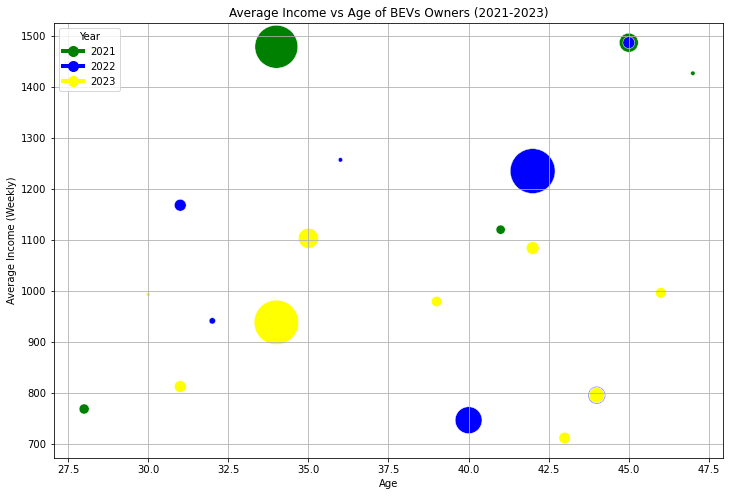

In [39]:
file_path = 'merged_data.csv'
data = pd.read_csv(file_path)

# Filter the data for only BEV (Battery Electric Vehicles)
bev_data = data[data['Fuel Type'] == 'BEV']

# Filter the data to include only the years 2021, 2022, and 2023
years_of_interest = [2021, 2022, 2023]
bev_data_years = bev_data[bev_data['Year'].isin(years_of_interest)]

# Group the data by age and year to calculate average income and total registrations per age for each year
grouped_data_years = bev_data_years.groupby(['Year', 'Age']).agg({'Average Income': 'mean', 'Registrations': 'sum'}).reset_index()

# Define the colors for each year
colors = {2021: 'green', 2022: 'blue', 2023: 'yellow'}

# Plotting
plt.figure(figsize=(12, 8))
for year in years_of_interest:
    year_data = grouped_data_years[grouped_data_years['Year'] == year]
    sns.scatterplot(data=year_data, x='Age', y='Average Income', size='Registrations', 
                    color=colors[year], sizes=(20, 2000), marker='o')

plt.title('Average Income vs Age of BEVs Owners (2021-2023)')
plt.xlabel('Age')
plt.ylabel('Average Income (Weekly)')
plt.grid(True)

# Creating a custom legend for years
legend_labels = [plt.Line2D([0], [0], color=color, lw=4, marker='o', markersize=10) for color in colors.values()]
plt.legend(legend_labels, [f'{year}' for year in years_of_interest], title='Year')

plt.show()